In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import matplotlib
%matplotlib inline
import scipy.stats as st


6.55669455104
expected 	 5 	 9
real 	 4.99394679672 	 8.89594990295


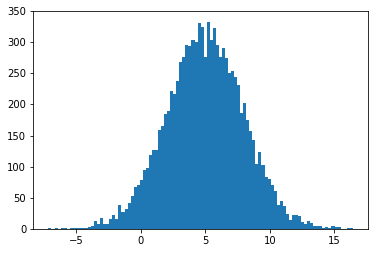

In [159]:
m = 5
s2 = 9

n = 10000
N = 48

mean = m /  N
variance = np.sqrt(s2 /N)


def normal():
    return sum(variance*np.sqrt(12)*(np.random.random(N)-0.5)+mean)

print(normal())

normal = np.array([sum(variance*np.sqrt(12)*(np.random.random(N)-0.5)+mean) for i in range(n)])
print('expected','\t',m,'\t',s2)
print('real','\t',normal.mean(),'\t',((n-1)/n)*normal.var())
a = plt.hist(normal, bins =100)



In [160]:
def сauchy (a=-1,b=3): #a-x0 b-gamma # mean and variance = undefined
    y=np.random.rand()
    x=a+b*np.tan(np.pi*(y-0.5)) 
    return x


def  t_distr(m=6): #распр стьюдента # (m>2) variance = m/m-2 | (m>1) ? mean = 0 : otherwise undefined 
    return st.t.rvs(df=m)

def generate_values(n=10000):
    cauchy_values =[ сauchy() for i in range(n)]
    t_distr_values = [t_distr() for i in range(n)]
    c_t = np.array(cauchy_values)
    t_t = np.array(t_distr_values)
    print('t-distribution')
    print('expected mean : ','\t',0,'\t','\t','variance : ','\t',6/4 )
    print('real mean : ','\t',np.mean(t_distr_values),'\t','variance : ','\t',np.var(t_distr_values) )
    
    print('Cauchy distribution')
    print('expected median : ','\t',-1)
    print('real median : ','\t',np.median(cauchy_values))
    return cauchy_values,t_distr_values
c,t = generate_values()

t-distribution
expected mean :  	 0 	 	 variance :  	 1.5
real mean :  	 -0.0258609509525 	 variance :  	 1.4430179708
Cauchy distribution
expected median :  	 -1
real median :  	 -1.03775069719


In [161]:
def normal():
    return sum(variance*np.sqrt(12)*(np.random.random(N)-0.5)+mean)

def comb_distribution(pi=0.5,n=10000):
    cd_values = list();
    for i in range(n):
        r = np.random.rand()
        val = t_distr() if r<pi else normal()
        cd_values.append(val)
    return cd_values

def mean_variance_cd(pi=0.5,m_n=5,v_n=9,m_t=0,v_t=1.5):
    mean = (1-pi)*m_n + (pi)*m_t
    variance = (1-pi)*((m_n-mean)**2+ v_n)+(pi)*((m_t-mean)**2+ v_t)
    return mean,variance

m,v = mean_variance_cd()
cd_values = comb_distribution()
print(np.mean(cd_values),'\t',np.var(cd_values))
print(m,'\t',v)



2.46529947762 	 11.5340483528
2.5 	 11.5


In [3]:
def box_muller(n=10000):
    z0_values = list()
    z1_values = list()
    z_values = list()
    for i in range(n):
        r1 = np.random.rand()
        r2 = np.random.rand()
        z0 = np.cos(2*np.pi*r1)*(-2*np.log(r2))**0.5
        z1 = np.sin(2*np.pi*r1)*(-2*np.log(r2))**0.5
        z0_values.append(z0)
        z1_values.append(z1)
        z_values.append(z0)
        z_values.append(z1)
    return z0_values,z1_values,z_values
z0_v,z1_v,z_v = box_muller()
print('\t','mean','\t\t\t\t','variance')
print (np.mean(z0_v) ,np.mean(z1_v),np.var(z0_v),np.var(z1_v) )

z0_aver = np.average(z0_v)
z1_aver = np.average(z1_v)

print(z0_aver,z1_aver)
nnn = len(z0_v)
def cov():
    s_u = 0
    s_l_x=0
    s_l_y=0
    s_l=0
    for i in range(nnn):
        s_u+=(z0_v[i]-z0_aver)*(z1_v[i]-z1_aver)
    for i in range(len(z0_v)):
        s_l_x+=(z0_v[i]-z0_aver)**2
        s_l_y+=((z1_v[i]-z1_aver)**2)
    s_l=(s_l_x*s_l_y)**0.5
    return s_u/s_l
print(cov())
    

	 mean 				 variance
-0.00432978506526 0.00667320931839 0.995525817003 1.01052067591
-0.00432978506526 0.00667320931839
-0.00767555757263
